## IBM HR Analytics Employee Attrition Modeling .

### DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

### Data Dictionary

Age: Age of employee

Attrition: Employee attrition status

Department: Department of work

Distance From Home

Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;

Education Field

Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

Marital Status

Monthly Income

Num Companies Worked: Number of companies worked prior to IBM

Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;

Years At Company: Current years of service in IBM

In [1]:
import warnings 
import numpy as np 
%matplotlib inline
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [2]:
data=pd.read_csv('C:\\Users\Okwua\\IBM Attrition Data.csv')

In [3]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [5]:
#total number of null values 
print(data.isna().sum().sum())

print(data.duplicated().sum().sum())

0
0


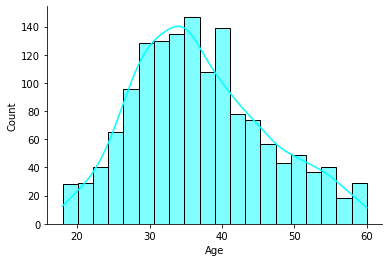

In [6]:
# Find the age distribution of employees in IBM
sns.histplot(x='Age', data=data,
            kde=True, bins=20, color='cyan')
sns.despine();


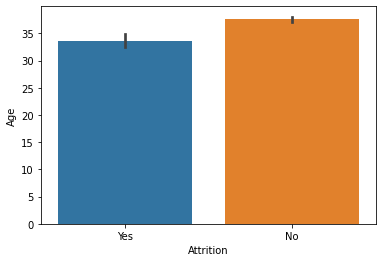

In [7]:
# Explore attrition by age
sns.barplot(x = 'Attrition',
            y = 'Age',
            data = data)
 
# Show the plot
plt.show()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64


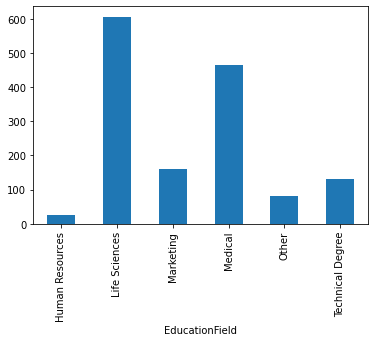

In [8]:
# Counting the occurrences of each unique category
GroupedData=data.groupby(by='EducationField').size()
print(GroupedData)
 
# Generating a bar chart for a single column
%matplotlib inline
GroupedData.plot.bar()
plt.show();

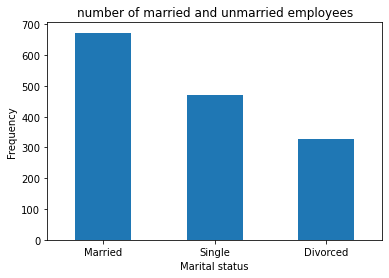

In [9]:
# Give a bar chart for the number of married and unmarried employees
Marital_status=pd.value_counts(data['MaritalStatus'], sort = True)
Marital_status.plot(kind= 'bar', rot=0)
plt.title('number of married and unmarried employees')
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.show()


In [10]:
data.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [11]:
features=['Department','EducationField','MaritalStatus']  
data=pd.get_dummies(data,columns=features,drop_first=True)


data['Attrition'].replace({'Yes': 0,'No': 1}, inplace=True) 

data


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,0,1,2,2,4,5993,8,1,6,0,1,1,0,0,0,0,0,1
1,49,1,8,1,3,2,5130,1,3,10,1,0,1,0,0,0,0,1,0
2,37,0,2,2,4,3,2090,6,3,0,1,0,0,0,0,1,0,0,1
3,33,1,3,4,4,3,2909,1,3,8,1,0,1,0,0,0,0,1,0
4,27,1,2,1,1,2,3468,9,3,2,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,23,2,3,4,2571,4,3,5,1,0,0,0,1,0,0,1,0
1466,39,1,6,1,4,1,9991,4,3,7,1,0,0,0,1,0,0,1,0
1467,27,1,4,3,2,2,6142,1,3,6,1,0,1,0,0,0,0,1,0
1468,49,1,2,3,4,2,5390,2,2,9,0,1,0,0,1,0,0,1,0


In [12]:
# move tagret column to last position 
new_cols = [col for col in data.columns if col != 'Attrition'] + ['Attrition']
data= data[new_cols]
data

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,41,1,2,2,4,5993,8,1,6,0,1,1,0,0,0,0,0,1,0
1,49,8,1,3,2,5130,1,3,10,1,0,1,0,0,0,0,1,0,1
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,0,1,0,0,1,0
3,33,3,4,4,3,2909,1,3,8,1,0,1,0,0,0,0,1,0,1
4,27,2,1,1,2,3468,9,3,2,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2571,4,3,5,1,0,0,0,1,0,0,1,0,1
1466,39,6,1,4,1,9991,4,3,7,1,0,0,0,1,0,0,1,0,1
1467,27,4,3,2,2,6142,1,3,6,1,0,1,0,0,0,0,1,0,1
1468,49,2,3,4,2,5390,2,2,9,0,1,0,0,1,0,0,1,0,1


In [13]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

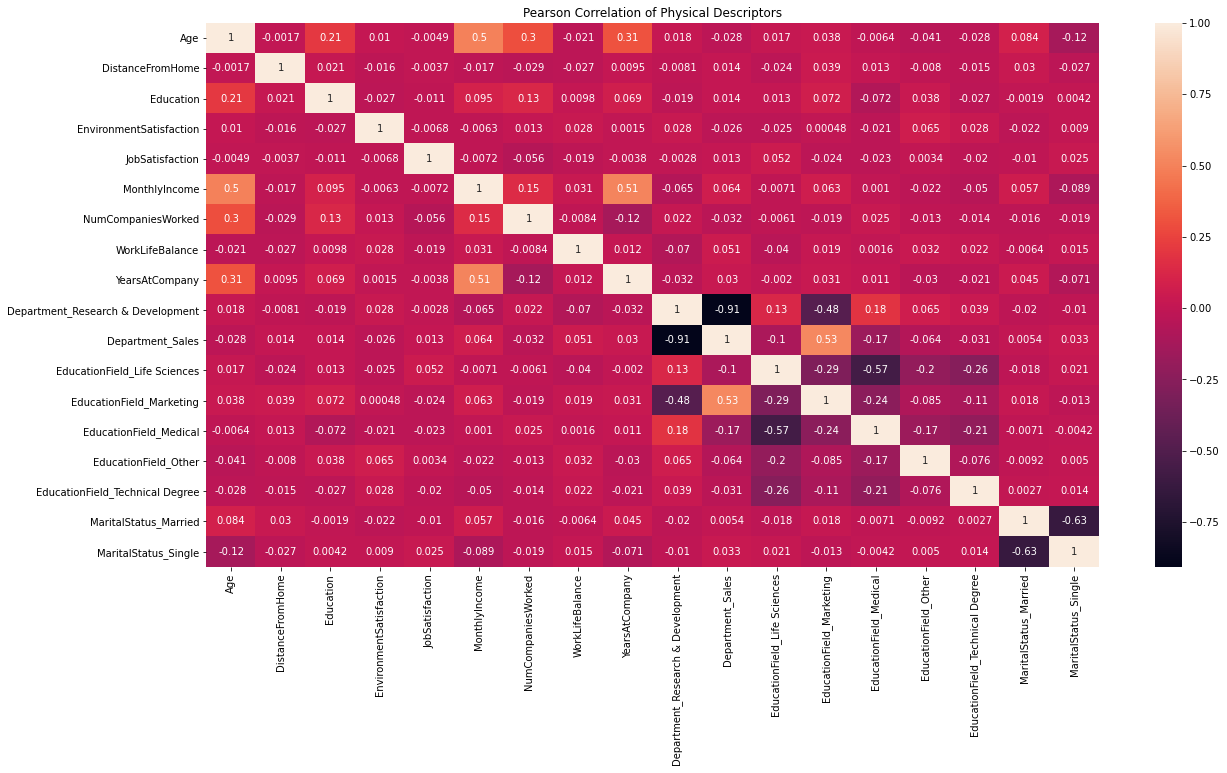

In [14]:
#correlation matrix for physical descriptors 
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20,10))  
ax=sns.heatmap(corrMatrix,annot=True,linecolor='white')
ax.set_title('Pearson Correlation of Physical Descriptors');
plt.show()

In [15]:
print(X.shape,y.shape)

(1470, 18) (1470,)


In [16]:
scaler_x=StandardScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)

In [17]:
X_scaled, y

(array([[ 0.4463504 , -1.01090934, -0.89168825, ..., -0.31409347,
         -0.91892141,  1.45864991],
        [ 1.32236521, -0.14714972, -1.86842575, ..., -0.31409347,
          1.08823234, -0.68556546],
        [ 0.008343  , -0.88751511, -0.89168825, ..., -0.31409347,
         -0.91892141,  1.45864991],
        ...,
        [-1.08667552, -0.64072665,  0.08504925, ..., -0.31409347,
          1.08823234, -0.68556546],
        [ 1.32236521, -0.88751511,  0.08504925, ..., -0.31409347,
          1.08823234, -0.68556546],
        [-0.32016256, -0.14714972,  0.08504925, ..., -0.31409347,
          1.08823234, -0.68556546]]),
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 1465    1
 1466    1
 1467    1
 1468    1
 1469    1
 Name: Attrition, Length: 1470, dtype: int64)

In [18]:
y.value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

In [19]:
#oversampling 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter 
os=RandomOverSampler(1.0)
X1, y1=os.fit_resample(X_scaled,y)
print("The number of classes after fit {}".format(Counter(y1)))

The number of classes after fit Counter({0: 1233, 1: 1233})


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2, random_state=1)

In [21]:
#Fitting the model 
log=LogisticRegression( )
log.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Evaluation matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred=log.predict(X_test)
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

[[184  73]
 [ 84 153]]
0.6821862348178138
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       257
           1       0.68      0.65      0.66       237

    accuracy                           0.68       494
   macro avg       0.68      0.68      0.68       494
weighted avg       0.68      0.68      0.68       494



In [23]:
cl=RandomForestClassifier().fit(X_train,y_train)


In [24]:
ypredRf=cl.predict(X_test)
print(confusion_matrix(y_test,ypredRf))
print(accuracy_score(y_test,ypredRf))
print(classification_report(y_test,ypredRf))

[[256   1]
 [ 10 227]]
0.9777327935222672
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       257
           1       1.00      0.96      0.98       237

    accuracy                           0.98       494
   macro avg       0.98      0.98      0.98       494
weighted avg       0.98      0.98      0.98       494



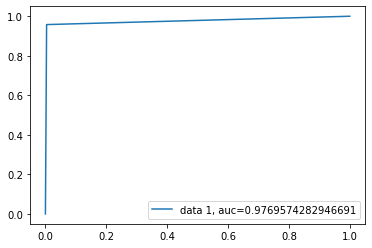

In [25]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  ypredRf)
auc = metrics.roc_auc_score(y_test, ypredRf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

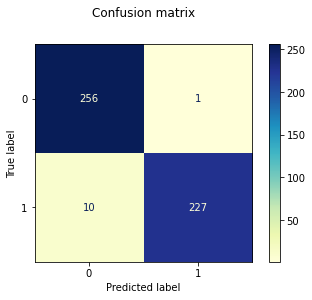

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cl, X_test, y_test, values_format = '',cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1);